In [1]:
import requests
import pandas as pd
import json
import cenpy
from cenpy import products


In [2]:
acs = cenpy.products.ACS()

In [ ]:
# here are the 2019 ACS 5 year variables: https://api.census.gov/data/2019/acs/acs5/variables.html
lacounty = products.ACS(2019).from_county('Los Angeles, CA', level='tract',
                                            variables=['B01003_001E','B02001_002E','B02001_003E','B02001_004E','B02001_005E','B02001_006E','B02001_007E','B19013_001E', 'B15003_001E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E'])
lacounty.head()

In [4]:
lacounty.rename(columns={'B19013_001E':'Median HHI','B01003_001E':'TotalPop', 'B02001_002E': 'WhitePop', 'B02001_003E':'BlackorAA','B02001_004E':'AmInd_AKnative','B02001_005E':'Asian','B02001_006E':'Hawaiian_PI','B02001_007E':'Other', 'B15003_001E':'EducTotal', 'B15003_022E':'EducBachelor','B15003_023E':'EducMasters', 'B15003_024E':'EducProf', 'B15003_025E':'EducDoct'}, inplace=True)
lacounty.head()

,GEOID,geometry,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,Hawaiian_PI,Other,EducTotal,EducBachelor,EducMasters,EducProf,EducDoct,Median HHI,NAME,state,county,tract
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,763.0,94.0,6.0,816.0,0.0,9.0,1321.0,425.0,271.0,171.0,60.0,186667.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,1985.0,108.0,6.0,88.0,57.0,1838.0,2354.0,123.0,19.0,0.0,0.0,49952.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,2068.0,152.0,122.0,33.0,0.0,1454.0,2404.0,100.0,16.0,0.0,0.0,44527.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,1674.0,374.0,0.0,239.0,14.0,465.0,2096.0,410.0,153.0,12.0,0.0,36742.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,2462.0,508.0,0.0,453.0,0.0,455.0,3163.0,930.0,268.0,57.0,34.0,49982.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801


In [5]:
lacounty['PctNHW'] = lacounty.WhitePop.astype(float)/lacounty.TotalPop.astype(float)*100
lacounty['PctBlackAA'] = lacounty.BlackorAA.astype(float)/lacounty.TotalPop.astype(float)*100
lacounty['PctAsian'] = lacounty.Asian.astype(float)/lacounty.TotalPop.astype(float)*100
lacounty['pctPOC'] = 100-lacounty.PctNHW
lacounty['PctBachelor'] = lacounty.EducBachelor.astype(float)/lacounty.EducTotal.astype(float)*100
lacounty['PctMasters'] = (lacounty.EducMasters.astype(float)+lacounty.EducProf.astype(float))/lacounty.EducTotal.astype(float)*100
lacounty['PctDoctorate'] = lacounty.EducDoct.astype(float)/lacounty.EducTotal.astype(float)*100

lacounty.head()

,GEOID,geometry,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,Hawaiian_PI,Other,EducTotal,...,state,county,tract,PctNHW,PctBlackAA,PctAsian,pctPOC,PctBachelor,PctMasters,PctDoctorate
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,763.0,94.0,6.0,816.0,0.0,9.0,1321.0,...,06,037,670406,43.376919,5.343945,46.389994,56.623081,32.172597,33.459500,4.542014
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,1985.0,108.0,6.0,88.0,57.0,1838.0,2354.0,...,06,037,294810,46.400187,2.524544,2.057036,53.599813,5.225149,0.807137,0.000000
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,2068.0,152.0,122.0,33.0,0.0,1454.0,2404.0,...,06,037,294830,50.024190,3.676826,0.798258,49.975810,4.159734,0.665557,0.000000
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,1674.0,374.0,0.0,239.0,14.0,465.0,2096.0,...,06,037,576501,56.061621,12.525117,8.004019,43.938379,19.561069,7.872137,0.000000
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,2462.0,508.0,0.0,453.0,0.0,455.0,3163.0,...,06,037,576801,60.491400,12.481572,11.130221,39.508600,29.402466,10.275055,1.074929


In [6]:
lacounty.head()

,GEOID,geometry,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,Hawaiian_PI,Other,EducTotal,...,state,county,tract,PctNHW,PctBlackAA,PctAsian,pctPOC,PctBachelor,PctMasters,PctDoctorate
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,763.0,94.0,6.0,816.0,0.0,9.0,1321.0,...,06,037,670406,43.376919,5.343945,46.389994,56.623081,32.172597,33.459500,4.542014
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,1985.0,108.0,6.0,88.0,57.0,1838.0,2354.0,...,06,037,294810,46.400187,2.524544,2.057036,53.599813,5.225149,0.807137,0.000000
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,2068.0,152.0,122.0,33.0,0.0,1454.0,2404.0,...,06,037,294830,50.024190,3.676826,0.798258,49.975810,4.159734,0.665557,0.000000
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,1674.0,374.0,0.0,239.0,14.0,465.0,2096.0,...,06,037,576501,56.061621,12.525117,8.004019,43.938379,19.561069,7.872137,0.000000
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,2462.0,508.0,0.0,453.0,0.0,455.0,3163.0,...,06,037,576801,60.491400,12.481572,11.130221,39.508600,29.402466,10.275055,1.074929


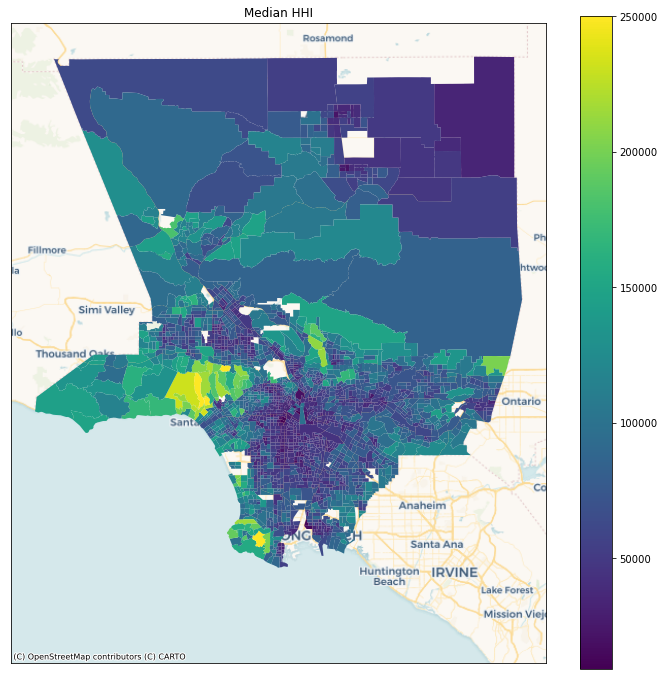

In [7]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 12))
lacounty.plot('Median HHI', ax = ax, legend=True)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])

# set the limits to remove Catalina
ax.set_ylim([3.96*1e6, 4.15*1e6])

ax.set_title('Median HHI')
ctx.add_basemap(ax, crs=lacounty.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

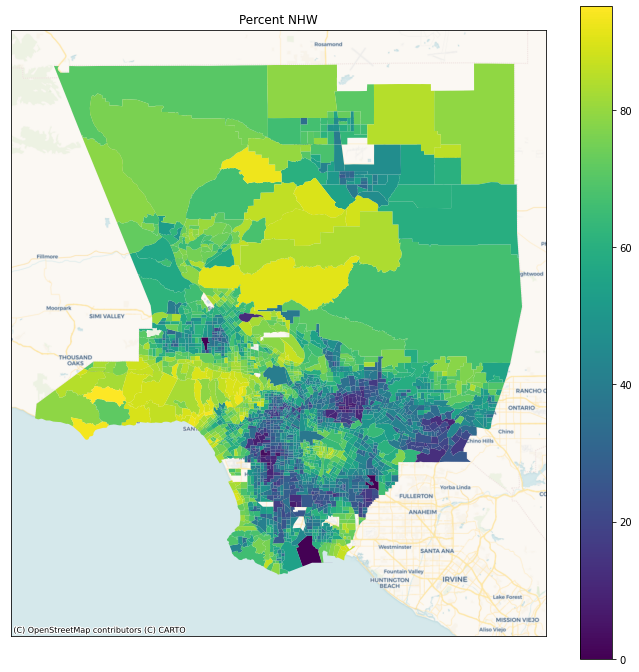

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
lacounty.plot('PctNHW', ax = ax, legend=True)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])

# set the limits to remove Catalina
ax.set_ylim([3.97*1e6, 4.15*1e6])

ax.set_title('Percent NHW')
ctx.add_basemap(ax, crs=lacounty.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

<AxesSubplot:>

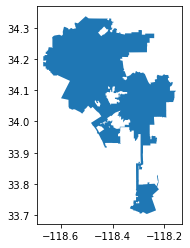

In [9]:
import geopandas as gpd

LA_boundary = gpd.read_file('City_Boundary.geojson')
LA_boundary.plot()

In [12]:
LA_boundary = LA_boundary.to_crs(epsg=4326)
lacounty=lacounty.to_crs(epsg=4326)

In [13]:
lacounty_clipped=lacounty.clip(LA_boundary)

<AxesSubplot:>

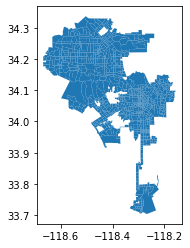

In [17]:
lacounty_clipped.plot()

Text(0.5, 1.0, 'Percent NHW')

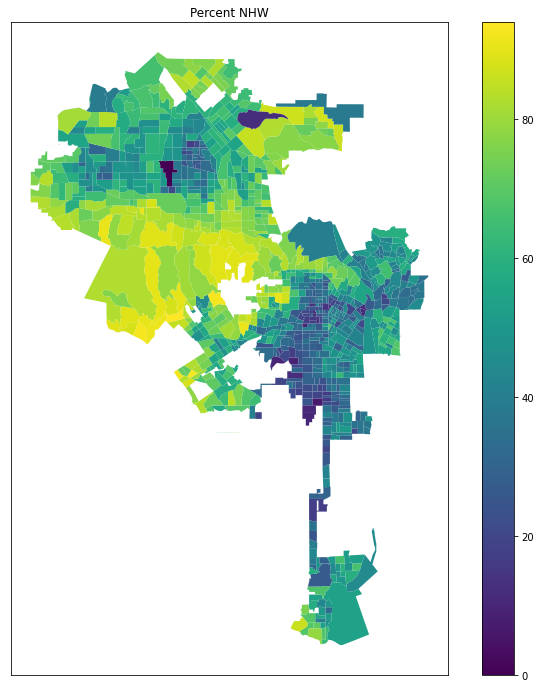

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
lacounty_clipped.plot('PctNHW', ax = ax, legend=True)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Percent NHW')
#ctx.add_basemap(ax, crs=lacounty.crs.to_string(), source=ctx.providers.CartoDB.Voyager)